In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

#np.random.seed(0)


In [43]:

# generate a 2-D OU process where time-varying parameters are specified as an array
def generateOU(N,dt,mean_p,revert,sigma, X_init=None):
    #This method returns a 2-D OU process using the Euler-Maruyama method
    x = np.zeros((N,2))
    if X_init:
        x[0] = X_init
    for i in range(N-1):
        x[i+1]=x[i]+revert[i]*(mean_p[i]-x[i])*dt+math.sqrt(dt)*sigma[i]@np.random.normal(0,1,size=2)
        
    return x

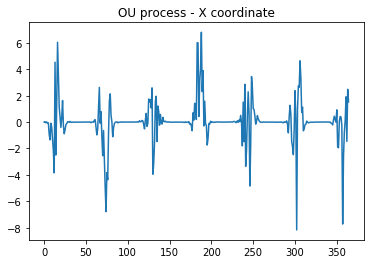

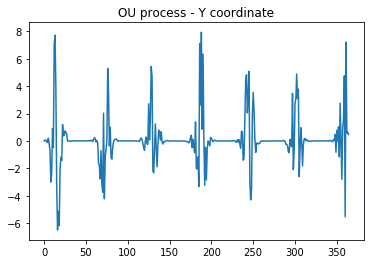

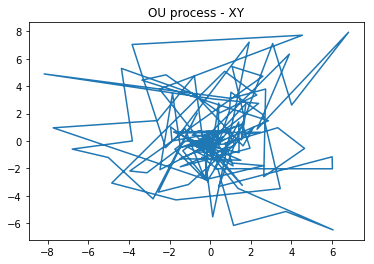

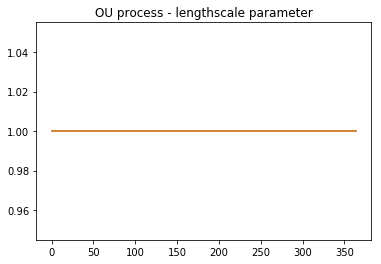

In [44]:



day_steps=10
dt=1.0/day_steps
N=int(365*day_steps) # run for 5 years

sigma=np.zeros((N,2,2))
#sigma[:,1,1]=0.01
#sigma[:,0,0]=0.01
sigma[:,1,0]=np.exp(4*np.sin(np.arange(N)/(0.25*365)))/10
sigma[:,0,1]=np.exp(4*np.sin(np.arange(N)/(0.25*365)))/10

revert= np.ones((N,2))

revert[:,0]=1#np.exp(2*np.sin(np.arange(N)/(0.5*365)))
revert[:,1]=1#np.exp(2*np.sin(np.arange(N)/(0.5*365)))
mean_p = np.zeros((N,2))

X=generateOU(N,dt,mean_p,revert,sigma)

T=np.arange(0,N//day_steps)# time


#T=T.reshape(-1,1)


plt.plot(T,X[::day_steps,0])
plt.title('OU process - X coordinate')
plt.show()

plt.plot(T,X[::day_steps,1])
plt.title('OU process - Y coordinate')
plt.show()

plt.plot(X[::day_steps,0],X[::day_steps,1])
plt.title('OU process - XY')
plt.show()

plt.plot(revert[::day_steps]**-1)
plt.title('OU process - lengthscale parameter')
plt.show()

#plt.plot(sigma[::day_steps]**-1)
#plt.title('OU process - timescale parameter')
#plt.show()


dataset = pd.DataFrame({'Animal':np.zeros_like(T),
                        'Date':pd.to_datetime(T, unit='D', origin=pd.Timestamp('2018-01-01')),
                        'Time':pd.to_datetime(pd.to_datetime(T, unit='D', origin=pd.Timestamp('2018-01-01')), format='%H:%M').time,
                        'Latitude':X[::day_steps,0],
                        'Longitude':X[::day_steps,1],'Lengthscale':revert[::day_steps,1]**-1})

dataset.to_csv('periodic_variance.csv')

In [45]:
#sigma=np.zeros((N,2,2))# so you have N 2X2 MATRICES WITH 
#sigma[:,1,1]=0.01
#sigma[:,0,0]=0.01
#sigma[:,1,0]=np.exp(2*np.sin(np.arange(N)/(1000*365)))
#sigma[:,0,1]=np.exp(2*np.sin(np.arange(N)/(1000*365)))

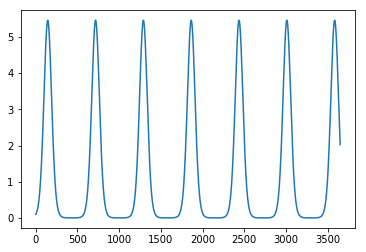

In [46]:
sigma[:,1,0]=np.exp(4*np.sin(np.arange(N)/(0.25*365)))/10
plt.plot(sigma[:,1,0])

In [47]:
sigma[:,1,0]

array([0.1       , 0.10448097, 0.10916215, ..., 2.14673496, 2.08677182,
       2.02774357])